# Analise dos dados utilizando Bag of Words

Alunos: Arthur B. Pinotti, Eduardo Brandt, Henrique F. de Azevedo, Kaue Reblin, Luiz G. Klitzke

### Dependencias gerais

In [4]:
# Bibliotecas de Sistema e Gerenciamento de Arquivos
import os  # Manipulação de caminhos de arquivos
import math  # Funções matemáticas (ex.: logaritmos, arredondamentos)

# Processamento de Linguagem Natural
import nltk  # Tokenização, stopwords, manipulação de texto
import string  # Manipulação de strings e pontuações
from nltk.tokenize import word_tokenize  # Tokenização de texto
from nltk.corpus import stopwords  # Stopwords em múltiplos idiomas


# Baixar os recursos necessários do NLTK
nltk.download('punkt')
nltk.download('stopwords')
# Definir a lista de stopwords para o idioma desejado (por exemplo, 'portuguese' ou 'english')
stop_words = set(stopwords.words('english'))

# Manipulação de Dados
import pandas as pd

# Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns

# Vetorização de Texto e Similaridade
from sklearn.feature_extraction.text import CountVectorizer # Vetorização com Bag of Words (BoW)
from sklearn.feature_extraction.text import TfidfVectorizer  # Vetorização com TF-IDF
from sklearn.metrics.pairwise import cosine_similarity  # Cálculo de similaridade cosseno

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luiz.klitzke\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luiz.klitzke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Carregar os dados do .CSV

Esses dados já foram pré-processados, passando por remoção de stopwords, pontuações e etc.

In [3]:
import csv

# Criação de listas para armazenar os dados que entrarão no DataFrame
documentos                   = []
textos_brutos                = []
textos_processados           = []
textos_processados_sem_split = []

# Etapa 2: Iterar pelos arquivos e ler o conteúdo
with open("DadosMinerados.csv", "r", encoding='utf-8') as infile:
    reader = csv.reader(infile, delimiter=',')

    # Pular os headers
    next(reader, None)  # skip the headers

    for row in reader:
        documentos.append(row[0])
        textos_brutos.append(row[1])
        textos_processados.append(row[2].replace("'", "").replace(",", "").replace("[", "").replace("]", "").split())
        textos_processados_sem_split.append(row[2].replace("'", "").replace(",", "").replace("[", "").replace("]", ""))

# Etapa 3: Criar o DataFrame
df = pd.DataFrame({
    'documento'                 : documentos,
    'texto_bruto'               : textos_brutos,
    'texto_processado'          : textos_processados,
    'texto_processado_sem_split': textos_processados_sem_split,
})

# Visualizar o DataFrame
df

NameError: name 'pd' is not defined

### Separar uma porção dos dados

Vamos refazer o dataframe com apenas 50 documentos aleatórios, para tornar possível a visualização dos dados de maneira gráfica, uma vez que utilizando todos os quase 600 documentos, isso fica bem complicado.

In [14]:
import random

indices_aleatorios = random.sample(range(len(documentos)), 50)

documentos_resumidos                   = [documentos                  [i] for i in indices_aleatorios]
textos_brutos_resumidos                = [textos_brutos               [i] for i in indices_aleatorios]
textos_processados_resumidos           = [textos_processados          [i] for i in indices_aleatorios]
textos_processados_sem_split_resumidos = [textos_processados_sem_split[i] for i in indices_aleatorios]

# Criar um data frame resumido
df_resumido = pd.DataFrame({
    'documento'                 : documentos_resumidos,
    'texto_bruto'               : textos_brutos_resumidos,
    'texto_processado'          : textos_processados_resumidos,
    'texto_processado_sem_split': textos_processados_sem_split_resumidos,
})

df_resumido

,documento,texto_bruto,texto_processado,texto_processado_sem_split
0,illusory-script,\nIllusory Script\n\n\n\n\n\n\n\nSource: Playe...,"[illusory, script, source, players, handbook, ...",illusory script source players handbook 1stlev...
1,gust,\nGust\n\n\n\n\n\n\n\nSource: Xanathar's Guide...,"[gust, source, xanathars, guide, everything, t...",gust source xanathars guide everything transmu...
2,shocking-grasp,\nShocking Grasp\n\n\n\n\n\n\n\nSource: Player...,"[shocking, grasp, source, players, handbook, e...",shocking grasp source players handbook evocati...
3,stoneskin,\nStoneskin\n\n\n\n\n\n\n\nSource: Player's Ha...,"[stoneskin, source, players, handbook, 4thleve...",stoneskin source players handbook 4thlevel abj...
4,aura-of-vitality,\nAura of Vitality\n\n\n\n\n\n\n\nSource: Play...,"[aura, vitality, source, players, handbook, 3r...",aura vitality source players handbook 3rdlevel...
5,tashas-mind-whip,\nTasha's Mind Whip\n\n\n\n\n\n\n\nSource: Tas...,"[tashas, mind, whip, source, tashas, cauldron,...",tashas mind whip source tashas cauldron everyt...
6,bestow-curse,\nBestow Curse\n\n\n\n\n\n\n\nSource: Player's...,"[bestow, curse, source, players, handbook, 3rd...",bestow curse source players handbook 3rdlevel ...
7,mage-armor,\nMage Armor\n\n\n\n\n\n\n\nSource: Player's H...,"[mage, armor, source, players, handbook, 1stle...",mage armor source players handbook 1stlevel ab...
8,pulse-wave,\nPulse Wave\n\n\n\n\n\n\n\nSource: Explorer's...,"[pulse, wave, source, explorers, guide, wildem...",pulse wave source explorers guide wildemount 3...
9,conjure-animals,\nConjure Animals\n\n\n\n\n\n\n\nSource: Playe...,"[conjure, animals, source, players, handbook, ...",conjure animals source players handbook 3rdlev...


## Vetorização e Análises em Bag of Words

Para essa seção, como quase todas as análises são acompanhadas por comparações diretas, vamos utilizar direto a nossa porção resumida de dados aleatórios.

Usaremos o `CountVectorizer` da biblioteca `scikit-learn` para transformar os textos em vetores de contagem de palavras (Bag of Words).


In [16]:
# Instanciar o CountVectorizer
vectorizer = CountVectorizer()

# Aplicar a vetorização ao texto processado
X_bag_of_words = vectorizer.fit_transform(df_resumido['texto_processado_sem_split'])

# Converter a matriz esparsa resultante para um DataFrame
df_bag_of_words = pd.DataFrame(X_bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())

# Definir a coluna 'documento' como índice do DataFrame
df_bag_of_words.index = df_resumido['documento']

df_bag_of_words

,10,100,1000,10foot,11th,12,120,12d12,13,14,...,worth,would,write,writing,written,wrote,wychwood,xanathars,you,zombie
documento,,,,,,,,,,,,,,,,,,,,,
illusory-script,2,0,0,0,0,0,0,0,0,0,...,1,0,1,4,3,1,0,0,0,0
gust,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
shocking-grasp,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
stoneskin,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
aura-of-vitality,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tashas-mind-whip,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bestow-curse,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mage-armor,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
pulse-wave,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Análise da quantidade de tokens por documento

Após termos feito a vetorização por `CountVectorizer` da biblioteca `scikit-learn`, vamos analisar a contagem de tokens presente em cada documento, ordenando-os em ordem crescente e criando uma representação visual desses dados com um `sns.barplot` da biblioteca `Seaborn`.


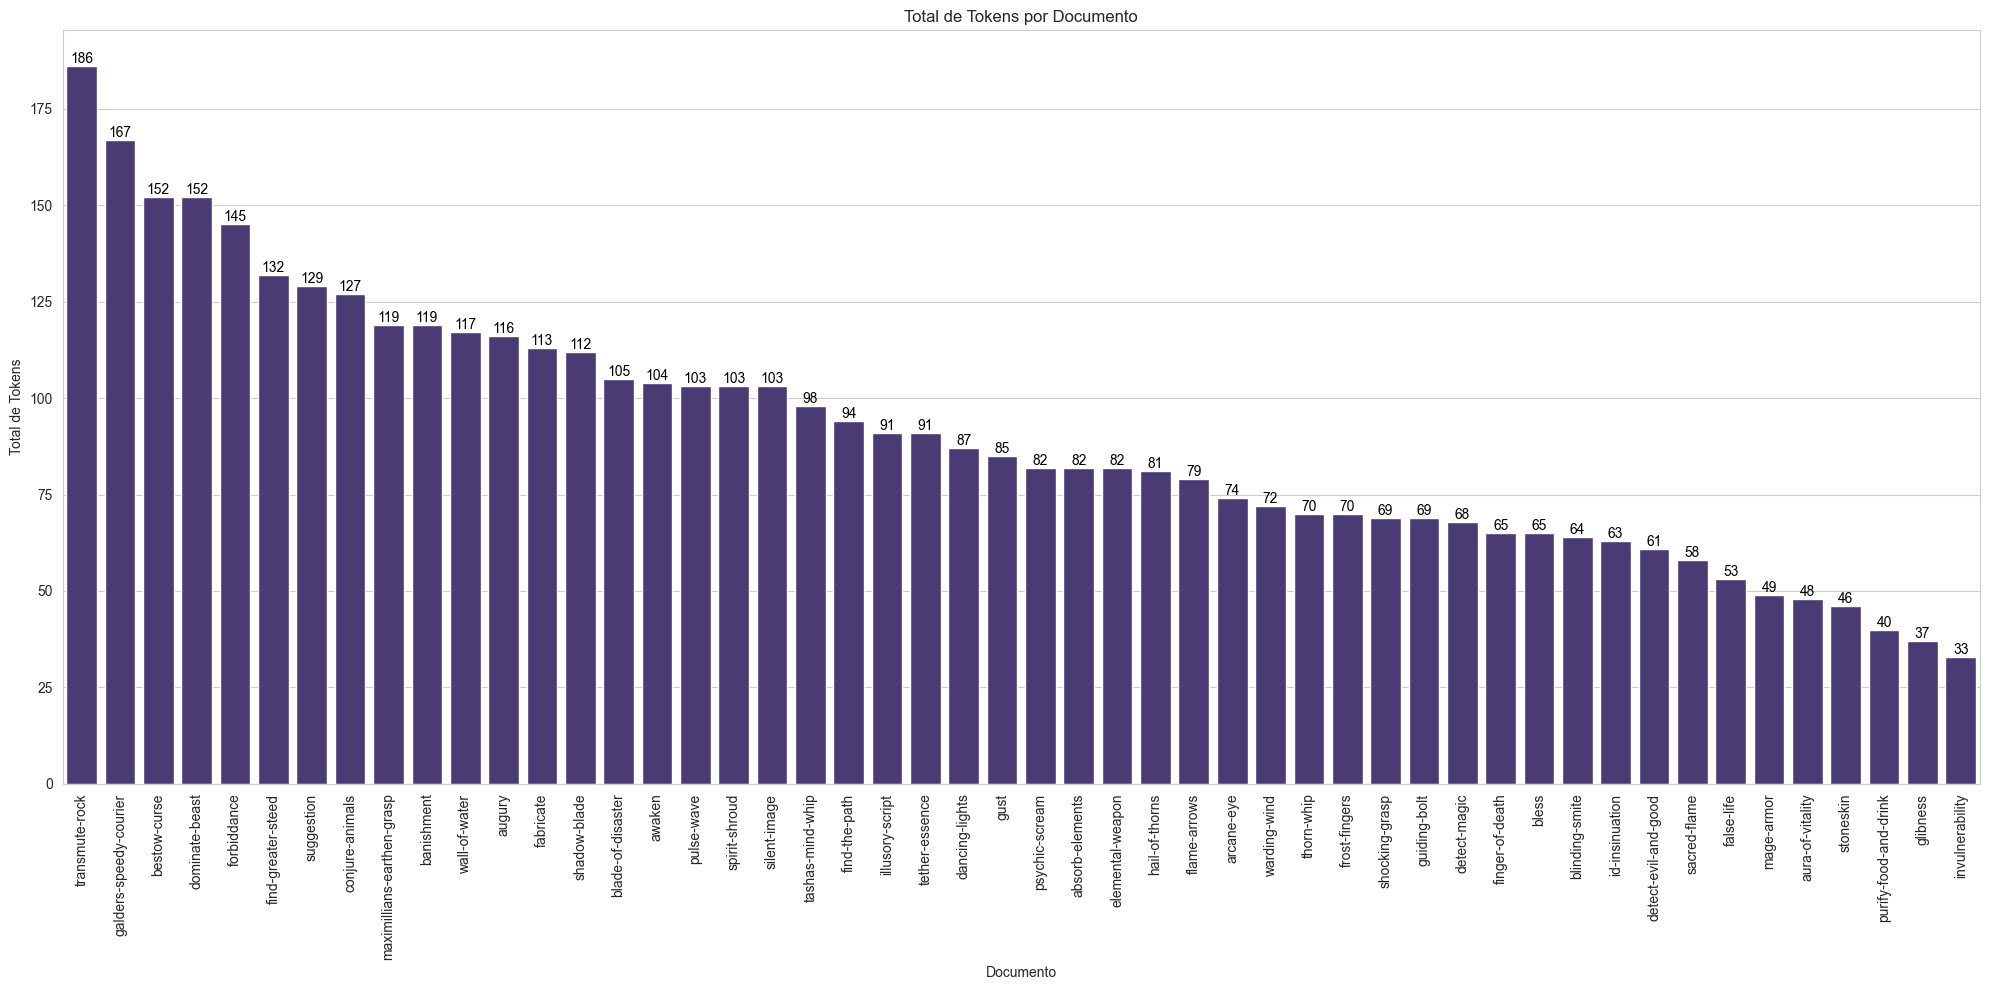

In [17]:
# Configurações de estilo e paleta de cores
sns.set_style("whitegrid")  # Estilo de grade branca
sns.set_palette("viridis")  # Paleta de cores 'viridis'

# Passo 1: Calcular o total de tokens em cada documento
total_tokens = df_bag_of_words.sum(axis=1)

# Criar um DataFrame para facilitar a plotagem
df_total_tokens = total_tokens.reset_index()
df_total_tokens.columns = ['Documento', 'Total de Tokens']

# Ordenar os documentos pela frequência de tokens em ordem decrescente
df_total_tokens = df_total_tokens.sort_values(by='Total de Tokens', ascending=False)

# Visualização do total de tokens por documento
plt.figure(figsize=(20,10))
barplot = sns.barplot(x='Documento', y='Total de Tokens', data=df_total_tokens)

# Adicionar os valores no topo das barras
for index, row in enumerate(df_total_tokens['Total de Tokens']):
    barplot.text(index, row, f'{int(row)}', color='black', ha="center", va="bottom")

# Ajustes de título e rótulos
plt.title('Total de Tokens por Documento')
plt.xlabel('Documento')
plt.ylabel('Total de Tokens')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X para melhor legibilidade
plt.tight_layout()

# Exibir o gráfico
plt.show()

Ao analisar o gráfico, podemos ver que a quantida de tokens varia de forma que o com mais tokens tem cerca de 6x a quantidade do com menos, indicando uma boa variação no tamanho das descrições presentes na base.
Além disso, podemos ver que a distribuição dos demais segue uma progressão em grupos com quantidades similares de tokens.

### Análise de riqueza do vocabulário

Este cálculo é a chave para medir a riqueza do vocabulário de cada documento. A riqueza do vocabulário é definida como a proporção entre o número de palavras únicas e o número total de palavras (tokens). Valores próximos de 1 indicam que quase todas as palavras no documento são únicas (ou seja, o vocabulário é mais variado), enquanto valores mais próximos de 0 indicam que há muita repetição de palavras.

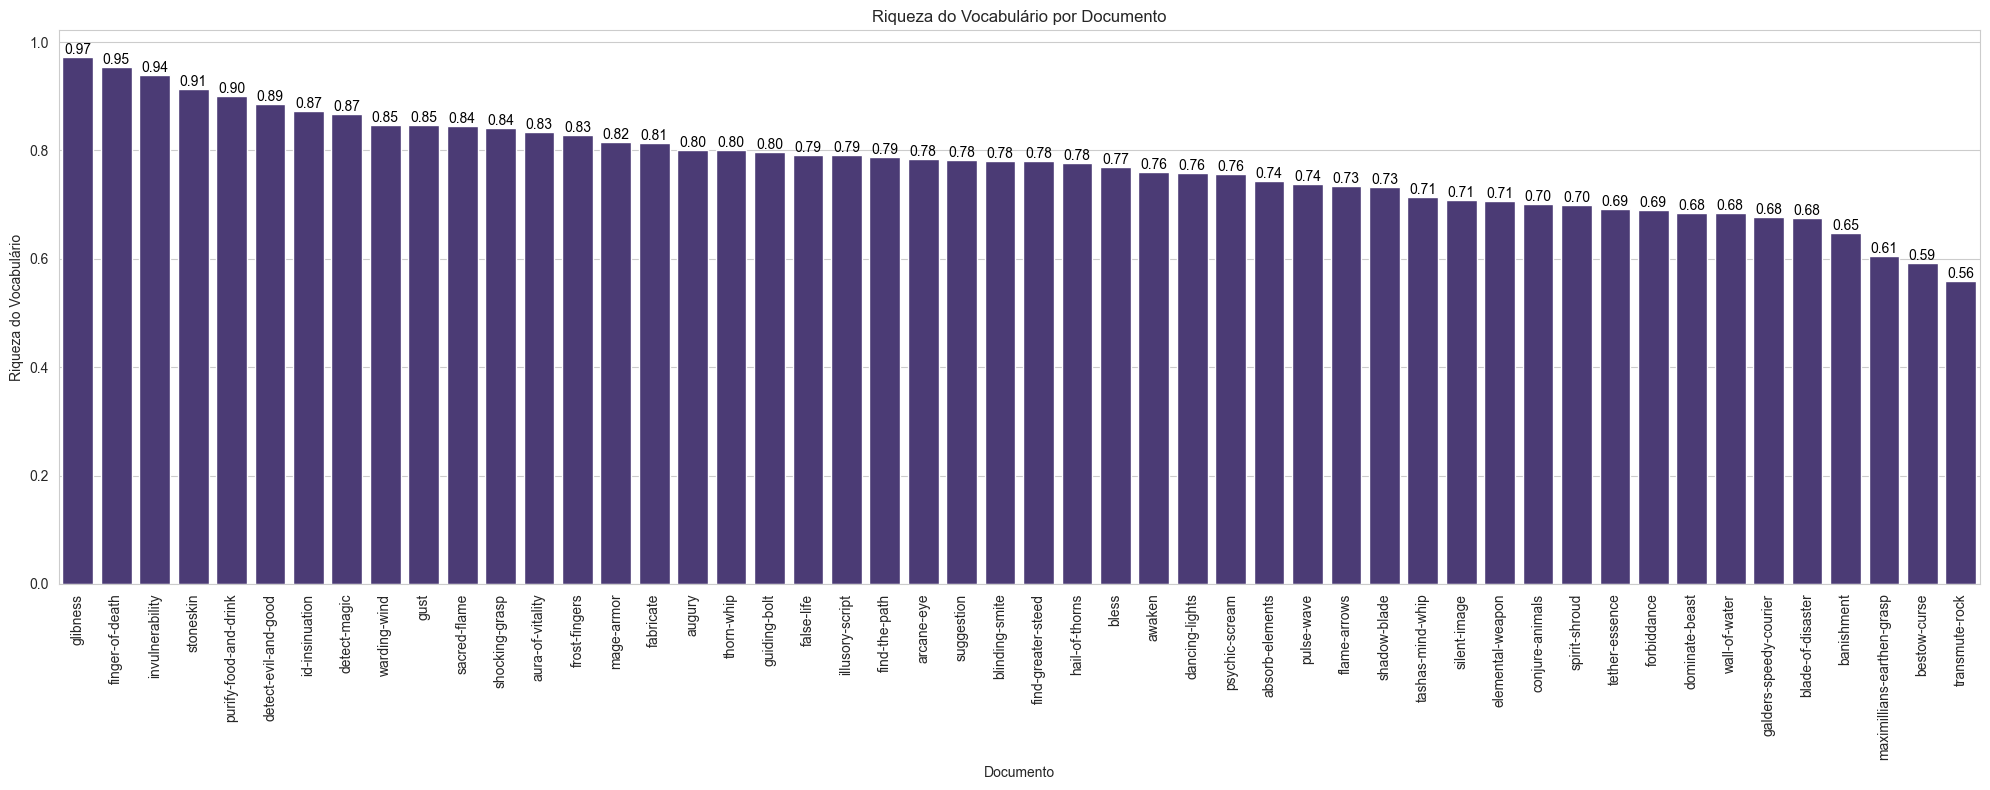

In [18]:
# Passo 1: Calcular o total de tokens (palavras) em cada documento
total_tokens = df_bag_of_words.sum(axis=1)

# Passo 2: Calcular o número de palavras únicas (não repetidas) em cada documento
unique_tokens = df_bag_of_words[df_bag_of_words > 0].count(axis=1)

# Passo 3: Calcular a riqueza do vocabulário (proporção de palavras únicas / total de palavras)
vocabulary_richness = unique_tokens / total_tokens

# Criar um DataFrame para facilitar a plotagem
df_richness = vocabulary_richness.reset_index()
df_richness.columns = ['Documento', 'Riqueza do Vocabulário']

# Ordenar os documentos pela riqueza do vocabulário em ordem decrescente
df_richness = df_richness.sort_values(by='Riqueza do Vocabulário', ascending=False)

# Visualizar a riqueza do vocabulário por documento
plt.figure(figsize=(20,8))
barplot = sns.barplot(x='Documento', y='Riqueza do Vocabulário', data=df_richness)

# Adicionar os valores no topo das barras
for index, row in enumerate(df_richness['Riqueza do Vocabulário']):
    barplot.text(index, row, f'{row:.2f}', color='black', ha="center", va="bottom")

# Ajustes de título e rótulos
plt.title('Riqueza do Vocabulário por Documento')
plt.xlabel('Documento')
plt.ylabel('Riqueza do Vocabulário')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X para melhor legibilidade
plt.tight_layout()

# Exibir o gráfico
plt.show()


Com essa análise, podemos ver que, mesmo com uma diferença grande da quantidade de tokens entre os documentos, a riqueza de seus vocabulários apresenta uma relação quase reversa, aonde o documento que possue a maior quantidade de tokens é a com a menor variedade.

### Top Tokens por documento

Segue a análise dos tokens mais frequentes em cada documento.

Primeiramente, obtemos os `n` tokens mais frequentes de cada doc utilizando `nlargest`.

In [19]:
def get_top_tokens(df, top_n=10):

    top_tokens_list = [
        {'documento': documento, 'token': token, 'frequencia': count}
        for documento, row in df.iterrows()
        for token, count in row.nlargest(top_n).items()  # Obtém os N tokens mais frequentes
        if count > 0  # Garante que os tokens tenham contagem maior que zero
    ]

    # Converter a lista em DataFrame
    df_top = pd.DataFrame(top_tokens_list)
    return df_top

df_top_tokens = get_top_tokens(df_bag_of_words, top_n=10)
print(df_top_tokens)

           documento     token  frequencia
0    illusory-script     spell           4
1    illusory-script   writing           4
2    illusory-script  illusion           3
3    illusory-script    script           3
4    illusory-script   written           3
..               ...       ...         ...
495           augury        25           2
496           augury     bones           2
497           augury        dm           2
498           augury      next           2
499           augury  optional           2

[500 rows x 3 columns]


Em seguida, podemos visualizar essa frequência visualmente.

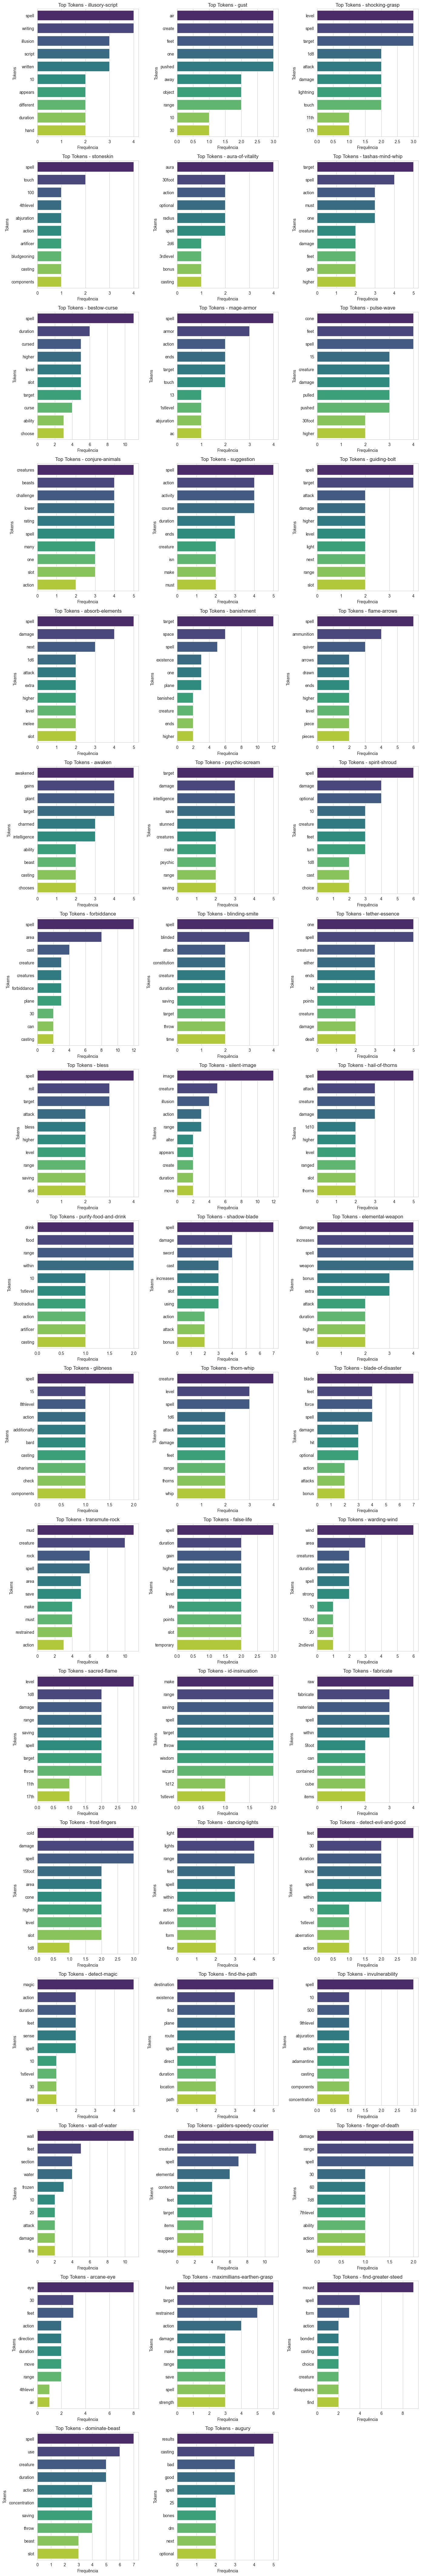

In [23]:
def plot_top_tokens_small_multiples(df_top_tokens, cols=3):
    # Obter a lista única de documentos
    documentos = df_top_tokens['documento'].unique()
    num_documentos = len(documentos)

    # Determinar o número de linhas com base no número de documentos e colunas
    rows = math.ceil(num_documentos / cols)

    # Definir o tamanho da figura com base no número de documentos e colunas
    fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows), sharex=False, sharey=False)

    # Se houver apenas uma linha ou coluna, garantir que axes seja uma matriz bidimensional
    axes = axes.flatten() if num_documentos > 1 else [axes]

    # Loop através de cada documento e criar um gráfico individual
    for i, documento in enumerate(documentos):
        ax = axes[i]
        df_subset = df_top_tokens[df_top_tokens['documento'] == documento]

        # Criar o gráfico de barras para os top tokens
        sns.barplot(x='frequencia', y='token', data=df_subset, ax=ax, palette='viridis', hue='token', dodge=False)
        ax.set_title(f'Top Tokens - {documento}')
        ax.set_xlabel('Frequência')
        ax.set_ylabel('Tokens')

        # Verifica se a legenda foi criada antes de tentar removê-la
        if ax.legend_ is not None:
            ax.legend_.remove()

    # Remover eixos vazios, caso o número de documentos não preencha todas as posições
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Uso da função de plotagem com 2 colunas
plot_top_tokens_small_multiples(df_top_tokens, cols=3)

TODO: O que da pra analise disso aqui?

## Análise dos dados com vetorização TF-IDF (Term Frequency - Inverse Document Frequency)

O modelo TF-IDF calcula a relevância de uma palavra em um documento, levando em conta a frequência da palavra no documento (TF) e a frequência inversa nos outros documentos do corpus (IDF), penalizando termos muito comuns.

### Vetorização com TF-IDF

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Juntando os documentos processados novamente como strings
processed_docs_str = [' '.join(doc) for doc in textos_processados]

# Vetorização com TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(processed_docs_str)

# Convertendo a matriz TF-IDF para um dataframe para visualização
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df

NameError: name 'textos_processados' is not defined

### Cálculo da Similaridade por Cosseno

Essa métrica nos ajuda a entender quais documentos possuem conteúdo mais semelhante no corpus.

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculando a similaridade por cosseno entre os documentos
cosine_sim = cosine_similarity(tfidf_matrix)

# Convertendo para um DataFrame para melhor visualização
cosine_sim_df = pd.DataFrame(cosine_sim, index=[f"Doc{i+1}" for i in range(len(documentos))],
                             columns=[f"Doc{i+1}" for i in range(len(documentos))])

# Exibindo a matriz de similaridade por cosseno
cosine_sim_df

,Doc1,Doc2,Doc3,Doc4,Doc5,Doc6,Doc7,Doc8,Doc9,Doc10,...,Doc571,Doc572,Doc573,Doc574,Doc575,Doc576,Doc577,Doc578,Doc579,Doc580
Doc1,1.000000,0.075826,0.181883,0.218887,0.088079,0.229599,0.089871,0.050695,0.047901,0.180177,...,0.115462,0.064364,0.041472,0.115401,0.092521,0.071733,0.077794,0.056036,0.099094,0.075566
Doc2,0.075826,1.000000,0.162968,0.185924,0.033638,0.063357,0.065927,0.038759,0.050482,0.044130,...,0.056806,0.035497,0.014907,0.066964,0.037336,0.048497,0.029547,0.018896,0.045699,0.046115
Doc3,0.181883,0.162968,1.000000,0.391993,0.050336,0.226965,0.048082,0.022494,0.045049,0.168201,...,0.125904,0.045761,0.053670,0.102326,0.126458,0.058111,0.093259,0.037735,0.064776,0.056332
Doc4,0.218887,0.185924,0.391993,1.000000,0.036051,0.261015,0.066543,0.075178,0.062747,0.203374,...,0.105059,0.083363,0.072202,0.082920,0.144986,0.046918,0.116208,0.091412,0.074083,0.089791
Doc5,0.088079,0.033638,0.050336,0.036051,1.000000,0.078010,0.136559,0.017384,0.103227,0.038832,...,0.047318,0.039461,0.108385,0.037958,0.050775,0.078565,0.116651,0.052662,0.024651,0.063294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doc576,0.071733,0.048497,0.058111,0.046918,0.078565,0.064969,0.049486,0.017700,0.065648,0.030962,...,0.066206,0.072513,0.105730,0.036960,0.077235,1.000000,0.142185,0.050208,0.084673,0.103608
Doc577,0.077794,0.029547,0.093259,0.116208,0.116651,0.057436,0.124048,0.015795,0.019144,0.051143,...,0.075903,0.109132,0.581593,0.088554,0.104484,0.142185,1.000000,0.167138,0.109931,0.111182
Doc578,0.056036,0.018896,0.037735,0.091412,0.052662,0.047309,0.044093,0.065357,0.019585,0.030783,...,0.027250,0.076812,0.146708,0.043952,0.137255,0.050208,0.167138,1.000000,0.069180,0.079060
Doc579,0.099094,0.045699,0.064776,0.074083,0.024651,0.096578,0.045305,0.021610,0.033777,0.040609,...,0.163118,0.136090,0.050006,0.090614,0.105303,0.084673,0.109931,0.069180,1.000000,0.053336


Como temos um número muito grande de documentos, vamos omitir a representação gráfica nesse momento, deixando essa comparação para um momento posterior.

### Sistema de Recomendação de Documentos com Base em Similaridade

Nesta seção, implementamos um **sistema de recomendação de documentos** utilizando a similaridade por cosseno entre uma consulta fornecida pelo usuário e os documentos existentes.

- **Entrada do usuário**: O usuário insere um termo ou frase de busca.
- **Pré-processamento da consulta**: A consulta é processada da mesma forma que os documentos, incluindo tokenização, normalização e remoção de stopwords.
- **Vetor TF-IDF da consulta**: A consulta é transformada em um vetor TF-IDF usando o mesmo modelo que foi treinado com os documentos.
- **Cálculo da similaridade**: A similaridade por cosseno é calculada entre o vetor da consulta e os vetores TF-IDF dos documentos. Isso permite identificar quais documentos são mais relevantes para a consulta.
- **Ranqueamento das recomendações**: Os documentos são classificados em ordem decrescente de similaridade, e os mais relevantes são retornados ao usuário em um DataFrame.

Esse sistema de recomendação ajusta os resultados com base nos termos fornecidos, facilitando a recuperação dos documentos mais similares à consulta.


In [28]:
# Função para tokenizar, normalizar e remover stopwords e pontuação
def preprocess_document(doc):
    # Tokenização e normalização (lower case)
    tokens = word_tokenize(doc.lower())
    # Remoção de stopwords e pontuação
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return tokens

def recomendar_documentos_ajustada(consulta, df, tfidf_matrix, vectorizer):
    # Preprocessar a consulta da mesma maneira que os documentos
    consulta_processada = ' '.join(preprocess_document(consulta))

    # Vetorizar a consulta usando o mesmo modelo TF-IDF
    consulta_tfidf = vectorizer.transform([consulta_processada])

    # Calcular a similaridade por cosseno entre a consulta e os documentos
    similaridade = cosine_similarity(consulta_tfidf, tfidf_matrix)[0]

    # Obter os índices dos documentos ordenados pela similaridade
    indices_ranqueados = similaridade.argsort()[::-1]

    # Exibir os documentos mais similares com base no termo de busca e suas similaridades
    recomendacoes = pd.DataFrame({
        'Processed Document': df.loc[indices_ranqueados, 'Processed Document'],
        'Similaridade': similaridade[indices_ranqueados]
    })

    return recomendacoes

# Entrada pelo usuário
termo_busca = input("Digite os termos de busca: ")

# Obter as recomendações ajustadas com valores de similaridade
recomendacoes_df_ajustada = recomendar_documentos_ajustada(termo_busca, df_documents, tfidf_matrix, vectorizer)

recomendacoes_df_ajustada

### Clusterização de Documentos com K-Means

In [1]:
from sklearn.cluster import KMeans

# Definindo o número de clusters (podemos testar com 3 inicialmente)
num_clusters = 3

# Aplicando o KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Adicionando as labels de clusters ao DataFrame original
df_documents['Cluster'] = kmeans.labels_

# Exibindo os documentos e seus respectivos clusters
df_documents[['texto_bruto', 'Cluster']]

NameError: name 'tfidf_matrix' is not defined